In [2]:
from pypokerengine.utils.card_utils import gen_cards, estimate_hole_card_win_rate, Card, Deck

import numpy as np
import pickle


import matplotlib.pyplot as plt
%matplotlib inline

## Wich nb_simulation is best?

In [3]:
hole_card = gen_cards(['H4', 'D7'])
community_card = gen_cards(['D3', 'C5', 'C6'])

In [19]:
%%time
estimate_hole_card_win_rate(nb_simulation=200, nb_player=9, hole_card=hole_card, community_card=None)

CPU times: user 396 ms, sys: 0 ns, total: 396 ms
Wall time: 400 ms


0.05

In [13]:
%%time
means = []
stds = []

x = list(range(10, 1110, 100))

for i in x:
    res = [estimate_hole_card_win_rate(nb_simulation=i, nb_player=9, hole_card=hole_card,
                                       community_card=None) for j in range(10)]
    means.append(np.mean(res))
    stds.append(np.std(res))

CPU times: user 1min 29s, sys: 0 ns, total: 1min 29s
Wall time: 1min 29s


<Container object of 3 artists>

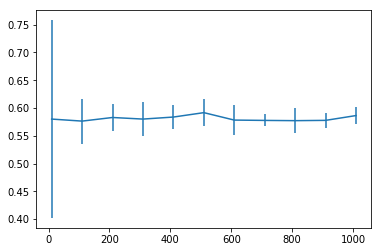

In [6]:
plt.errorbar(x, means, stds)

<Container object of 3 artists>

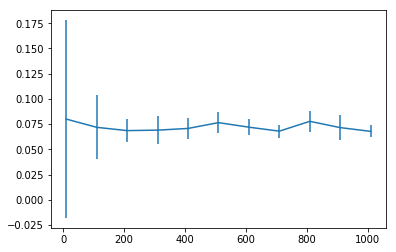

In [14]:
plt.errorbar(x, means, stds)

We see, that 200 is optimal number

## How estimate does depend from nb_player?

In [22]:
%%time
means = []
stds = []

x = list(range(2, 10))

for i in x:
    res = [estimate_hole_card_win_rate(nb_simulation=200, nb_player=i, hole_card=hole_card,
                                       community_card=community_card) for j in range(10)]
    means.append(np.mean(res))
    stds.append(np.std(res))

CPU times: user 12.1 s, sys: 4 ms, total: 12.1 s
Wall time: 12.1 s


<Container object of 3 artists>

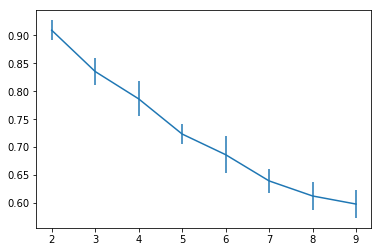

In [23]:
plt.errorbar(x, means, stds)

## Generating hand strength for each combination

In [21]:
suits = list(Card.SUIT_MAP.values())
ranks = list(Card.RANK_MAP.values())

CPU times: user 12.2 s, sys: 0 ns, total: 12.2 s
Wall time: 12.2 s


In [ ]:
%%time
scores = {}

for s1 in suits:
    for r1 in ranks:
        for s2 in suits:
            for r2 in ranks:
                card1 = s1 + r1
                card2 = s2 + r2
                if card1 == card2:
                    continue
                    
                hole1 = (card1, card2)
                hole2 = (card2, card1)
                estimation = estimate_hole_card_win_rate(nb_simulation=10_000, nb_player=9,
                                                         hole_card=gen_cards(hole1))
                scores[hole1] = estimation
                scores[hole2] = estimation

In [ ]:
with open('../cache/hole_card_estimation.pkl', 'wb') as f:
    pickle.dump(scores, f)

In [13]:
with open('../cache/hole_card_estimation.pkl', 'rb') as f:
    s = pickle.load(f)

In [14]:
len(s)

2652

In [15]:
s

{('C2', 'C3'): 0.0872,
 ('C3', 'C2'): 0.0872,
 ('C2', 'C4'): 0.0931,
 ('C4', 'C2'): 0.0931,
 ('C2', 'C5'): 0.0945,
 ('C5', 'C2'): 0.0945,
 ('C2', 'C6'): 0.0961,
 ('C6', 'C2'): 0.0961,
 ('C2', 'C7'): 0.0921,
 ('C7', 'C2'): 0.0921,
 ('C2', 'C8'): 0.0857,
 ('C8', 'C2'): 0.0857,
 ('C2', 'C9'): 0.1007,
 ('C9', 'C2'): 0.1007,
 ('C2', 'CT'): 0.0973,
 ('CT', 'C2'): 0.0973,
 ('C2', 'CJ'): 0.0996,
 ('CJ', 'C2'): 0.0996,
 ('C2', 'CQ'): 0.1124,
 ('CQ', 'C2'): 0.1124,
 ('C2', 'CK'): 0.1259,
 ('CK', 'C2'): 0.1259,
 ('C2', 'CA'): 0.1402,
 ('CA', 'C2'): 0.1402,
 ('C2', 'D2'): 0.1322,
 ('D2', 'C2'): 0.1322,
 ('C2', 'D3'): 0.0493,
 ('D3', 'C2'): 0.0493,
 ('C2', 'D4'): 0.0555,
 ('D4', 'C2'): 0.0555,
 ('C2', 'D5'): 0.0531,
 ('D5', 'C2'): 0.0531,
 ('C2', 'D6'): 0.0561,
 ('D6', 'C2'): 0.0561,
 ('C2', 'D7'): 0.05,
 ('D7', 'C2'): 0.05,
 ('C2', 'D8'): 0.0517,
 ('D8', 'C2'): 0.0517,
 ('C2', 'D9'): 0.0543,
 ('D9', 'C2'): 0.0543,
 ('C2', 'DT'): 0.0582,
 ('DT', 'C2'): 0.0582,
 ('C2', 'DJ'): 0.064,
 ('DJ', 'C2'): 0

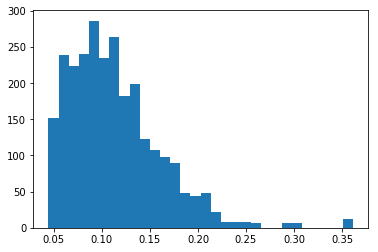

In [16]:
plt.hist(list(s.values()), bins=30);

In [17]:
sorted(s.items(), key=lambda x: -x[1])

[(('CA', 'DA'), 0.3612),
 (('DA', 'CA'), 0.3612),
 (('CA', 'HA'), 0.3579),
 (('HA', 'CA'), 0.3579),
 (('CA', 'SA'), 0.3577),
 (('SA', 'CA'), 0.3577),
 (('DA', 'SA'), 0.3574),
 (('SA', 'DA'), 0.3574),
 (('DA', 'HA'), 0.3565),
 (('HA', 'DA'), 0.3565),
 (('HA', 'SA'), 0.3532),
 (('SA', 'HA'), 0.3532),
 (('DK', 'SK'), 0.3014),
 (('SK', 'DK'), 0.3014),
 (('HK', 'SK'), 0.3009),
 (('SK', 'HK'), 0.3009),
 (('CK', 'HK'), 0.3008),
 (('HK', 'CK'), 0.3008),
 (('DK', 'HK'), 0.2966),
 (('HK', 'DK'), 0.2966),
 (('CK', 'SK'), 0.2955),
 (('SK', 'CK'), 0.2955),
 (('CK', 'DK'), 0.2931),
 (('DK', 'CK'), 0.2931),
 (('CQ', 'HQ'), 0.2583),
 (('HQ', 'CQ'), 0.2583),
 (('DQ', 'HQ'), 0.2582),
 (('HQ', 'DQ'), 0.2582),
 (('HQ', 'SQ'), 0.2571),
 (('SQ', 'HQ'), 0.2571),
 (('CQ', 'SQ'), 0.2549),
 (('SQ', 'CQ'), 0.2549),
 (('CQ', 'DQ'), 0.2515),
 (('DQ', 'CQ'), 0.2515),
 (('DQ', 'SQ'), 0.2503),
 (('SQ', 'DQ'), 0.2503),
 (('DK', 'DA'), 0.25),
 (('DA', 'DK'), 0.25),
 (('SK', 'SA'), 0.2449),
 (('SA', 'SK'), 0.2449),
 (('